In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string, re
import random

In [2]:
df =pd.read_csv("Customer-Churn-Records.csv")
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0           101348.88       1         1                   2   DIAMOND   
1           112542.58       0         1                   3   DIAMOND   
2           113931.57       1         1                   3   DIAMOND   
3            93826.63       0         0                   5      GOLD   
4            79084.10       0         0                   5      GOLD   
...               ...     ...       ...                 ...       ...   
9995         96270.64       0         0                   1   DIAMOND   
9996        101699.77       0         0                   5  PLATINUM   
9997         42085.58       1         1                   3    SILVER   
9998         92888.52       1         1                   2      GOLD   
9999         38190.78       0         0                   3   DIAMOND   

      Point Earned  
0              464  
1              456  
2              377  
3              350  
4              425  
...            ...  
9995           300  
9996           771  
9997           564  
9998           339  
9999           911  

[10000 rows x 18 columns]

In [3]:
# Looking into the data, there are several irrevelant columns in the data like RowNumber, 
#Surname and CustomerId which I think donot have nay impact on the outcme. So let's drop those columns.

df_new = df.drop(["RowNumber","CustomerId","Surname"], axis = 1)

In [4]:
df_new.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0          1               1        101348.88       1         1   
1          0               1        112542.58       0         1   
2          1               0        113931.57       1         1   
3          0               0         93826.63       0         0   
4          1               1         79084.10       0         0   

   Satisfaction Score Card Type  Point Earned  
0                   2   DIAMOND           464  
1                   3   DIAMOND           456  
2                   3   DIAMOND           377  
3                   5      GOLD           350  
4                   5      GOLD           425

In [5]:
print("Null Values:\n\n", df_new.isnull().sum())
print("<==================================================> \n")
print("Duplicated Values: ", df_new.duplicated().sum())

Null Values:

 CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64
<==================================================> 

Duplicated Values:  0


The dataset looks clean with no null values and no duplicate values making it easier for us to clean the data. Now, let's check other properties of the dataset.

## Statistical Summary of the dataset

In [6]:
df_new.describe() # It provides a summary of the central tendency, dispersion, and shape of the distribution of numerical data in the DataFrame

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  \
count  10000.00000    10000.000000     10000.000000  10000.000000   
mean       0.70550        0.515100    100090.239881      0.203800   
std        0.45584        0.499797     57510.492818      0.402842   
min        0.00000        0.000000        11.580000      0.000000   
25%        0.00000        0.000000     51002.110000      0.000000   
50%        1.00000        1.000000    100193.915000      0.000000   
75%        1.00000        1.000000    149388.247500      0.000000   
max        1.00000        1.000000    199992.480000      1.000000   

           Complain  Satisfaction Score  Point Earned  
count  10000.000000        10000.000000  10000.000000  
mean       0.204400            3.013800    606.515100  
std        0.403283            1.405919    225.924839  
min        0.000000            1.000000    119.000000  
25%        0.000000            2.000000    410.000000  
50%        0.000000            3.000000    605.000000  
75%        0.000000            4.000000    801.000000  
max        1.000000            5.000000   1000.000000

In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [8]:
# Check how the distribution of the target values is.
# Here the target values are in Exited column

df_new['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

In [9]:
# Exited is Our Target variable. Let's rename it to churn for convinience
df_new.rename(columns = {'Exited':'Churn'}, inplace = True)
df_new.head(5)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Churn  Complain  \
0          1               1        101348.88      1         1   
1          0               1        112542.58      0         1   
2          1               0        113931.57      1         1   
3          0               0         93826.63      0         0   
4          1               1         79084.10      0         0   

   Satisfaction Score Card Type  Point Earned  
0                   2   DIAMOND           464  
1                   3   DIAMOND           456  
2                   3   DIAMOND           377  
3                   5      GOLD           350  
4                   5      GOLD           425

The distribution looks very uneven. This does not directly affect the prediction or even the final result of the model. Let's see what we can do about it.
Exploratory Data Analysis and Visualization
1. Univariate Analysis
First step we will be looking at categorical data. Categorical data in the given dataset are:

1. Geography
2. Gender
3. Tenure
4. NumOfProducts
5. HasCrCard
6. IsActiveMember
7. Churn
8. Complain
9. Satisfaction Score
10. Card Type

<Axes: title={'center': 'Variable Geography'}, xlabel='Geography', ylabel='count'>

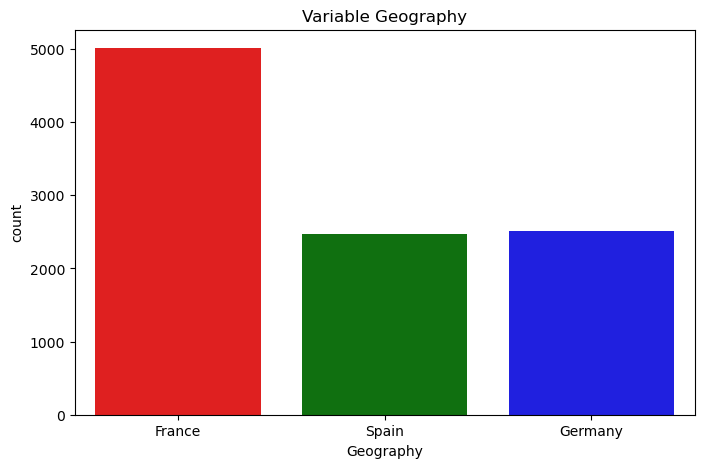

In [10]:
#
plt.figure(figsize = (8, 5))

plt.plot(5, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', palette = ["red", "green", "blue"], data = df_new)

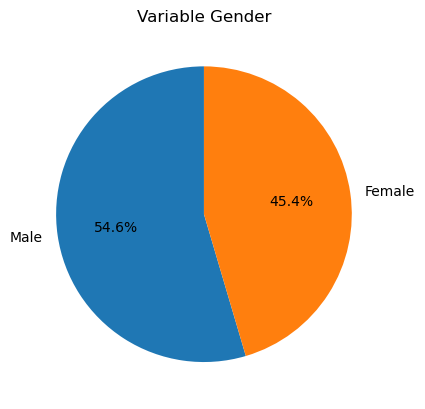

In [11]:
# Pie chart
plt.pie(df_new["Gender"].value_counts(), labels=df["Gender"].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title("Variable Gender")
plt.show()

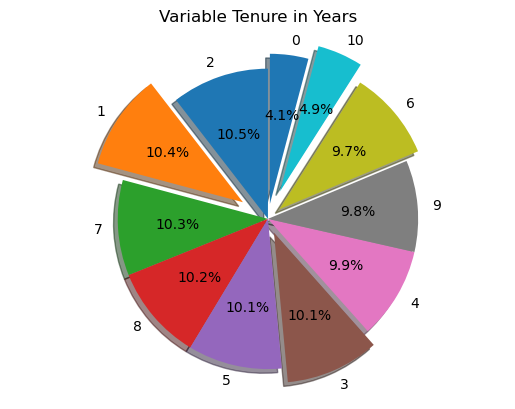

In [12]:
# Let'd draw similar pie chart in anther variable
# import random
counts = df_new["Tenure"].value_counts()
label = counts.index
plt.pie(counts, labels = label, startangle = 90, autopct = "%1.1f%%", shadow = True, explode = [0,0.2,0,0,0,0.1,0,0,0.1,0.2,0.1])
plt.axis('equal')
plt.title("Variable Tenure in Years")
plt.show()

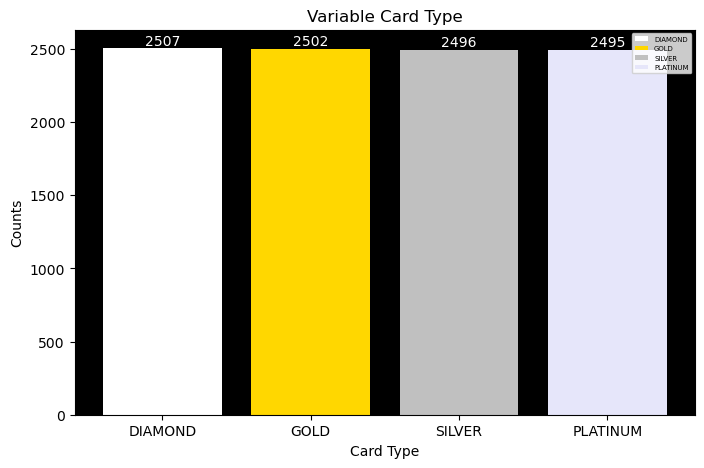

In [13]:
# Number of Products
count = df_new["Card Type"].value_counts().values
names = df_new["Card Type"].value_counts().index
plt.figure(figsize=(8, 5))
plt.bar(names,df_new["Card Type"].value_counts(), label = names, color = ['white','gold','silver','lavender'])
for i, v in enumerate(count):
    plt.text(i, v, str(v), ha='center', va='bottom', color = 'white')
plt.xlabel('Card Type')
plt.ylabel('Counts')
plt.title("Variable Card Type")
plt.legend(prop = {'size':5}, loc = 'upper right')
plt.gca().set_facecolor('black')
plt.show()

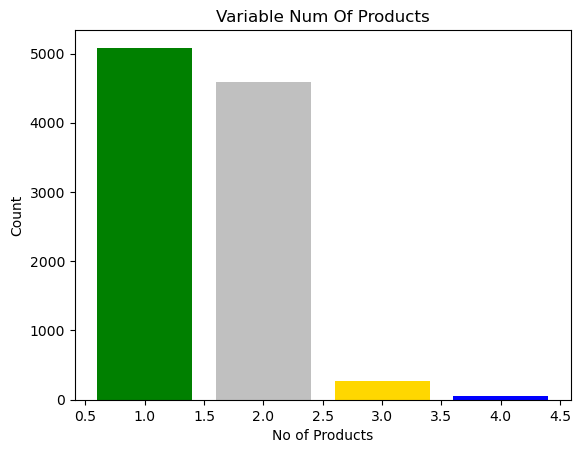

In [14]:
# Variable no of products
count = df_new['NumOfProducts'].value_counts().values
value = df_new['NumOfProducts'].value_counts().index
# print(value, count)
plt.bar(value, count, color = ['green', 'silver', 'gold', 'blue'])
plt.ylabel("Count")
plt.xlabel("No of Products")
plt.title("Variable Num Of Products")
plt.show()

<Axes: title={'center': 'Variable HasCrCard'}, xlabel='HasCrCard', ylabel='count'>

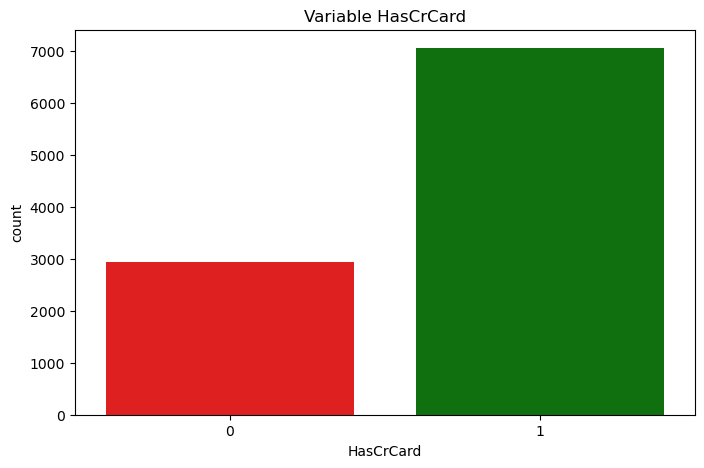

In [15]:
# Let's See what number of customers have credit cards anw what number don't
plt.figure(figsize = (8, 5))

plt.plot(5, 2, 1)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', palette = ["red", "green"], data = df_new)

<Axes: title={'center': 'Variable Is Active Member'}, xlabel='IsActiveMember', ylabel='count'>

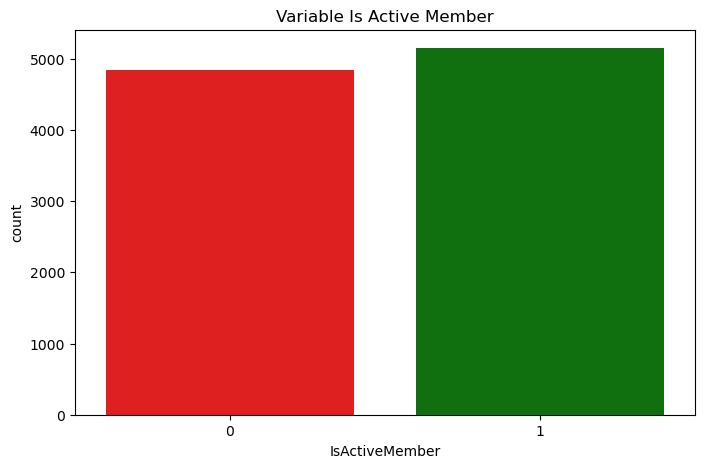

In [16]:
# Active member or not
plt.figure(figsize = (8, 5))

plt.plot(5, 2, 1)
plt.gca().set_title('Variable Is Active Member')
sns.countplot(x = 'IsActiveMember', palette = ["red", "green"], data = df_new)

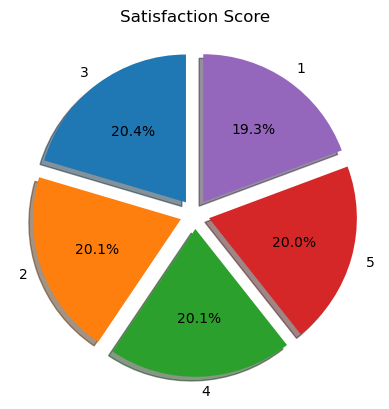

In [17]:
# Variable Satisfaction Score
# plt.figure(figsize = (8,5))
data = df_new['Satisfaction Score'].value_counts().values
score = df_new['Satisfaction Score'].value_counts().index
plt.pie(data, labels = score, startangle=90, autopct="%1.1f%%", explode = [0.1,0.1,0.1,0.1,0.1], shadow = True)
plt.title("Satisfaction Score")
plt.show()

## Continuous Data

Let's take a look at the distribution of the continuous data in the dataframe.


In [18]:
# Plotting CreditScore

def plot_continuous(a):
    print(a)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    sns.histplot(df[a], kde=True, ax=axes[0])
    axes[0].set_title(f'{a} Histogram')

    sns.boxplot(df[a],ax=axes[1])
    axes[1].set_title(f'{a} Boxplot')

    return plt.show()
# plot_continuous()

CreditScore


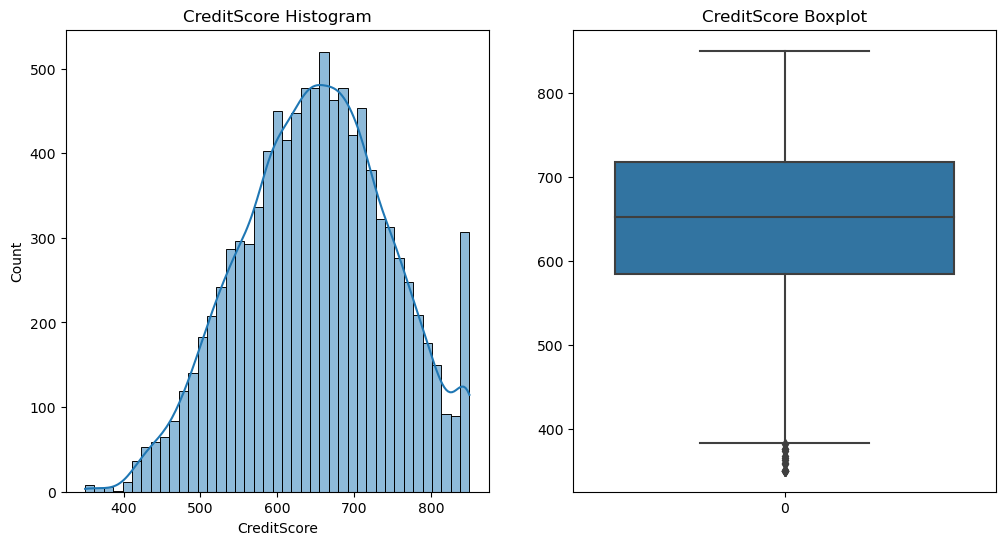

In [19]:
plot_continuous("CreditScore")

Age


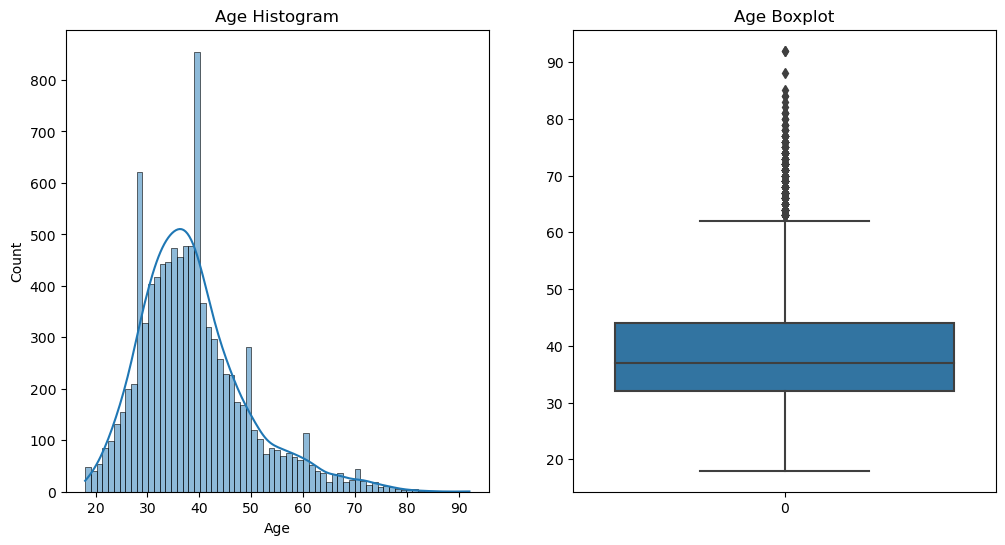

In [20]:
# Plotting Age
plot_continuous('Age')

Point Earned


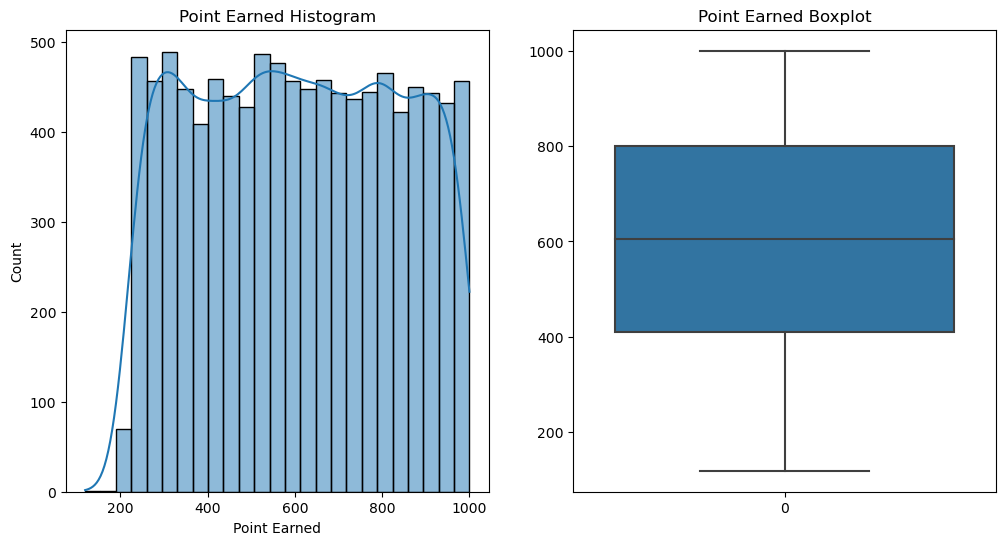

In [21]:
# Point Earned
plot_continuous('Point Earned')

EstimatedSalary


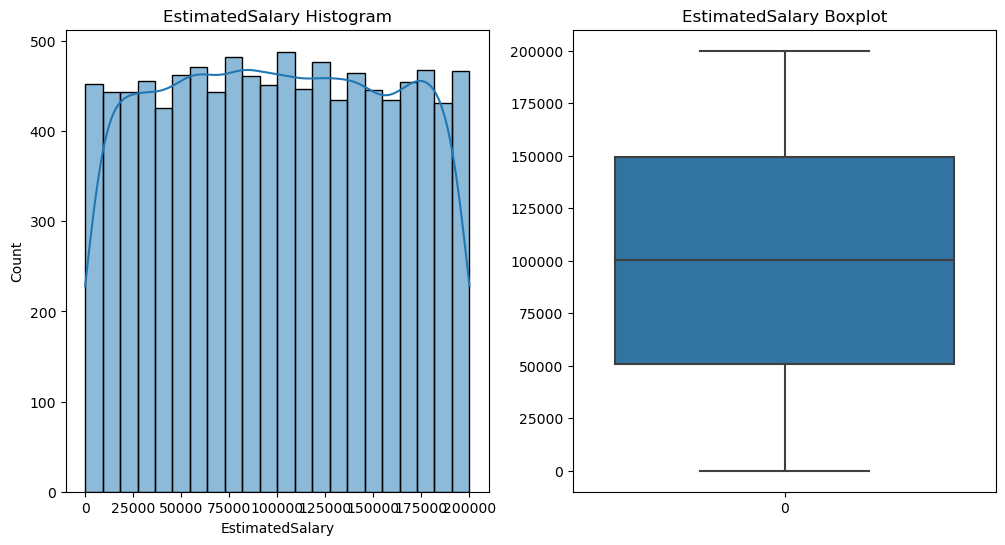

In [22]:
# Estimated Salary
plot_continuous('EstimatedSalary')

Balance


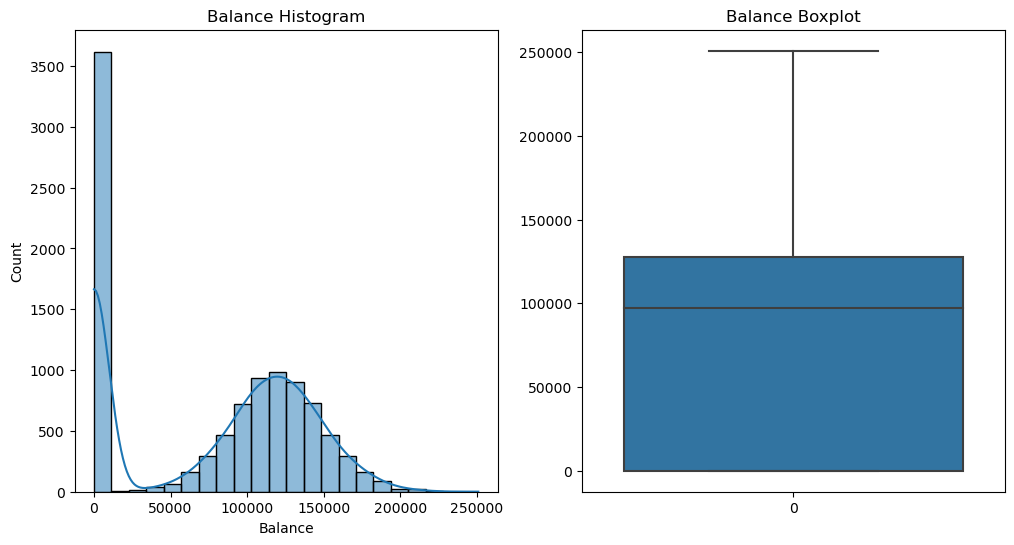

In [23]:
# Balance 
plot_continuous('Balance')

## Bivariate and Multivariate Analysis

In [ ]:
# Here our Target Variable is Churn
df['Churn'].value_counts()

In [24]:
# Here 0 is False and 1 is True. Meaning Almost 20% of our clients have exited while Almost 80% are still our customer.
# Let's check the variables that have impacted the result.

df_new

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Churn  Complain  \
0             1               1        101348.88      1         1   
1             0               1        112542.58      0         1   
2             1               0        113931.57      1         1   
3             0               0         93826.63      0         0   
4             1               1         79084.10      0         0   
...         ...             ...              ...    ...       ...   
9995          1               0         96270.64      0         0   
9996          1               1        101699.77      0         0   
9997          0               1         42085.58      1         1   
9998          1               0         92888.52      1         1   
9999          1               0         38190.78      0         0   

      Satisfaction Score Card Type  Point Earned  
0                      2   DIAMOND           464  
1                      3   DIAMOND           456  
2                      3   DIAMOND           377  
3                      5      GOLD           350  
4                      5      GOLD           425  
...                  ...       ...           ...  
9995                   1   DIAMOND           300  
9996                   5  PLATINUM           771  
9997                   3    SILVER           564  
9998                   2      GOLD           339  
9999                   3   DIAMOND           911  

[10000 rows x 15 columns]

In [25]:
df_new.corr() # Correlation

C:\Users\mdhus\AppData\Local\Temp\ipykernel_17036\1076233762.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new.corr() # Correlation


CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore            1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                   -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure                 0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance                0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts          0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard             -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember         0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary       -0.001384 -0.007201  0.007784  0.012797       0.014204   
Churn                 -0.026771  0.285296 -0.013656  0.118577      -0.047611   
Complain              -0.027048  0.283530 -0.013047  0.119124      -0.046357   
Satisfaction Score    -0.012599 -0.000876  0.008663 -0.002588      -0.011394   
Point Earned           0.000077  0.002222 -0.010196  0.014608      -0.015330   

                    HasCrCard  IsActiveMember  EstimatedSalary     Churn  \
CreditScore         -0.005458        0.025651        -0.001384 -0.026771   
Age                 -0.011721        0.085472        -0.007201  0.285296   
Tenure               0.022583       -0.028362         0.007784 -0.013656   
Balance             -0.014858       -0.010084         0.012797  0.118577   
NumOfProducts        0.003183        0.009612         0.014204 -0.047611   
HasCrCard            1.000000       -0.011866        -0.009933 -0.006976   
IsActiveMember      -0.011866        1.000000        -0.011421 -0.156356   
EstimatedSalary     -0.009933       -0.011421         1.000000  0.012490   
Churn               -0.006976       -0.156356         0.012490  1.000000   
Complain            -0.007095       -0.154741         0.012494  0.995693   
Satisfaction Score  -0.000212        0.010236        -0.013747 -0.005849   
Point Earned        -0.011041       -0.004983        -0.001515 -0.004628   

                    Complain  Satisfaction Score  Point Earned  
CreditScore        -0.027048           -0.012599      0.000077  
Age                 0.283530           -0.000876      0.002222  
Tenure             -0.013047            0.008663     -0.010196  
Balance             0.119124           -0.002588      0.014608  
NumOfProducts      -0.046357           -0.011394     -0.015330  
HasCrCard          -0.007095           -0.000212     -0.011041  
IsActiveMember     -0.154741            0.010236     -0.004983  
EstimatedSalary     0.012494           -0.013747     -0.001515  
Churn               0.995693           -0.005849     -0.004628  
Complain            1.000000           -0.004799     -0.002893  
Satisfaction Score -0.004799            1.000000     -0.014400  
Point Earned       -0.002893           -0.014400      1.000000

C:\Users\mdhus\AppData\Local\Temp\ipykernel_17036\247373242.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr(),annot=True ,cmap="YlGn" )


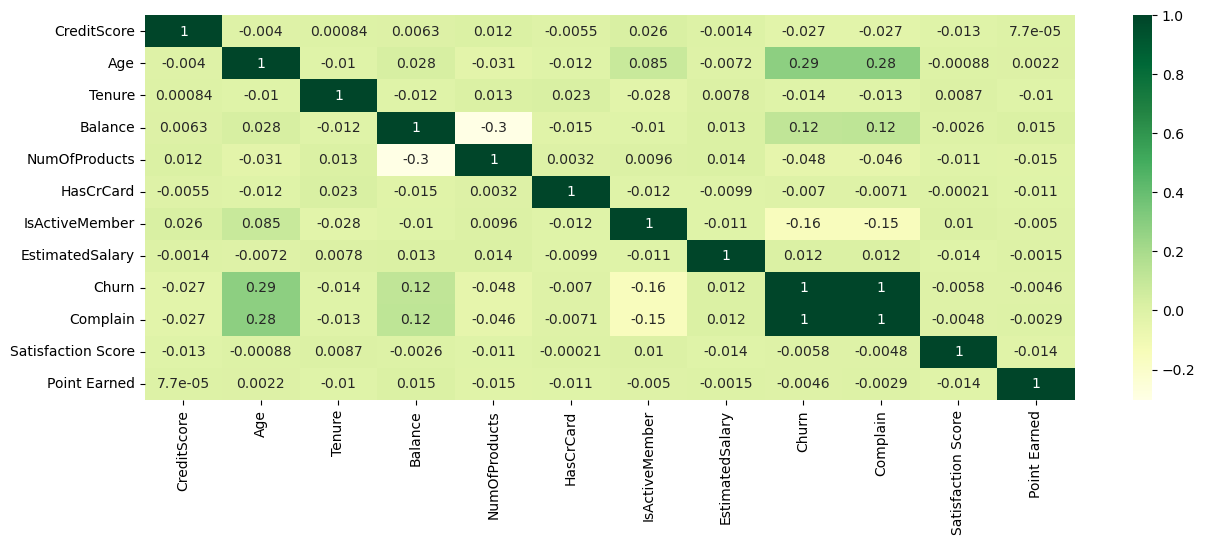

In [26]:
# Let's plot the correlation table
plt.figure(figsize=(15,5))
sns.heatmap(df_new.corr(),annot=True ,cmap="YlGn" )
plt.show()

In [27]:
df_new.drop('Complain', axis =1, inplace=True)

C:\Users\mdhus\AppData\Local\Temp\ipykernel_17036\3687440738.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr(),annot=True ,cmap="YlGn" )


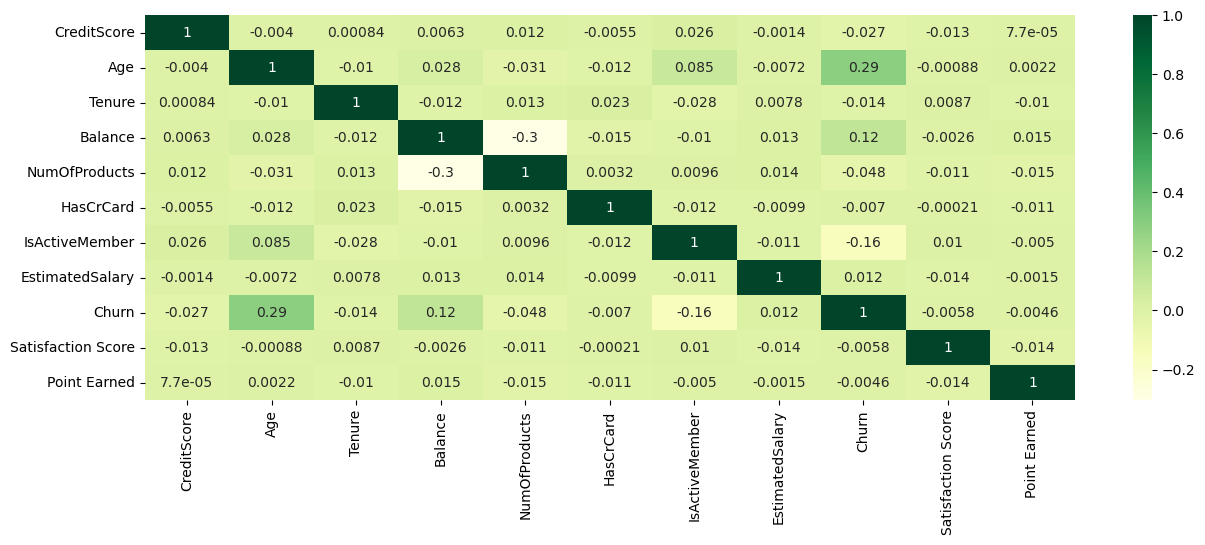

In [28]:
plt.figure(figsize=(15,5))
sns.heatmap(df_new.corr(),annot=True ,cmap="YlGn" )
plt.show()

In [ ]:
# Lets plot and see how various variables ipacted the exit of the customers
# Relationship of  with Exited

# 1. Geography

# 2. Gender

# 3. Tenure

# 4. NumOfProducts

# 5. HasCrCard

# 6. IsActiveMember

# 7. Churn

# 8. Complain ##

# 9. Satisfaction Score

# 10. Card Type



In [30]:
def multivariate_comparision(a, b):
#     a = input("Enter the variable to caopare with the target variable: ")
#     fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    plt.title(f'{a} w.r.t. {b}')
    sns.countplot(x = a, hue = b, palette = ['Red','Green'], data = df_new)
    plt.gca().set_facecolor('lightblue')
    

# compare_with_target('Geography')


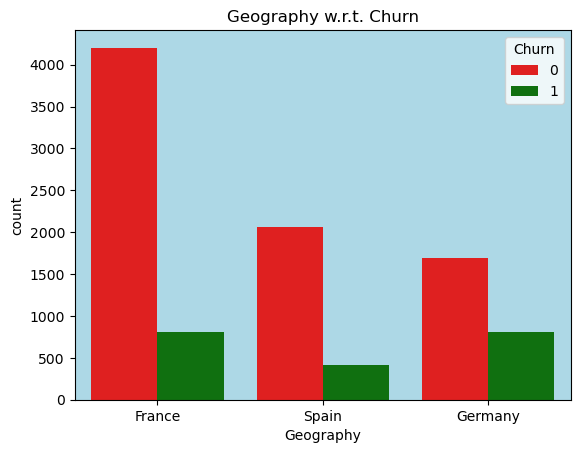

In [31]:
multivariate_comparision("Geography", "Churn")

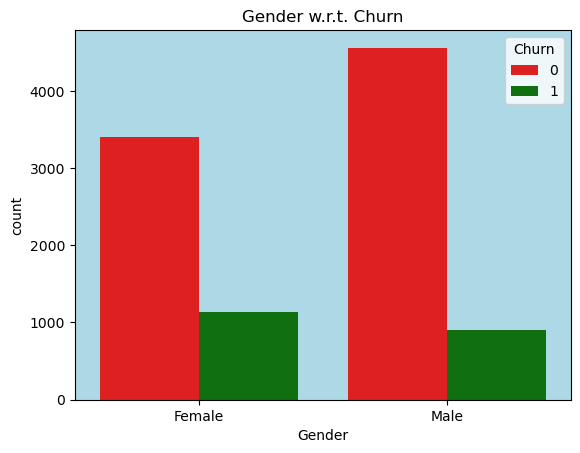

In [32]:
multivariate_comparision('Gender', 'Churn')

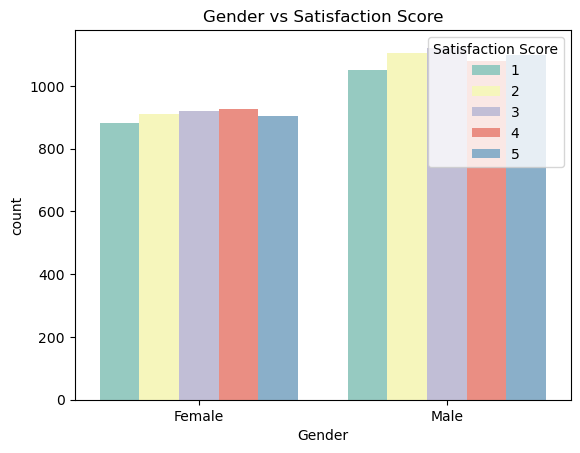

In [140]:
# Gender and Satisfaction Score
compare_with_target("Gender", "Satisfaction Score")

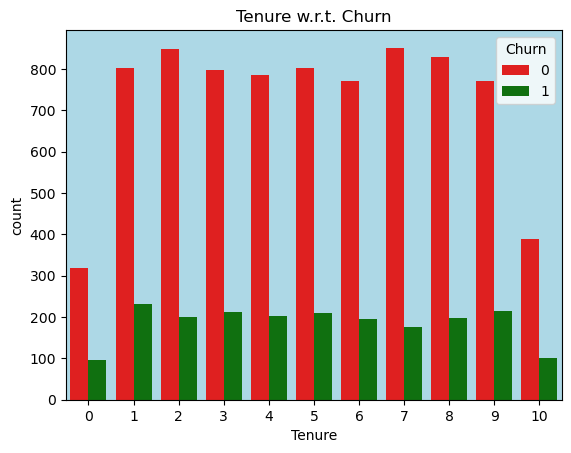

In [34]:
multivariate_comparision("Tenure", "Churn")

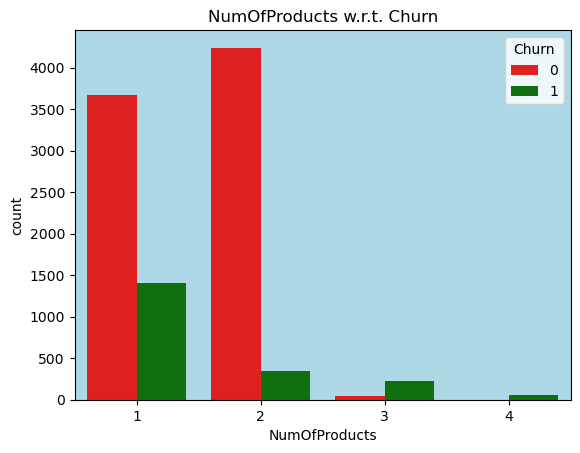

In [35]:
multivariate_comparision("NumOfProducts", "Churn")

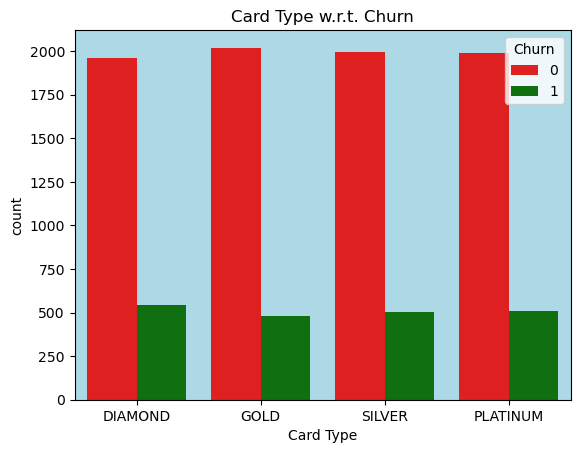

In [36]:
multivariate_comparision("Card Type", "Churn")

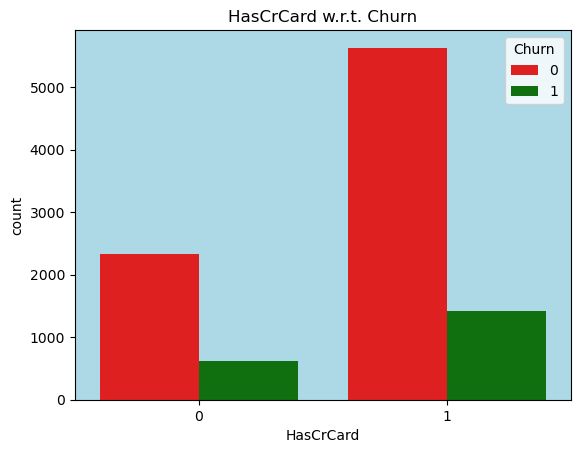

In [37]:
multivariate_comparision("HasCrCard", "Churn")

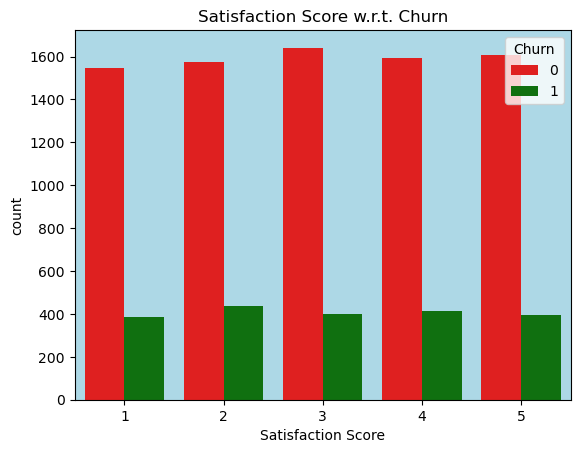

In [38]:
multivariate_comparision("Satisfaction Score", "Churn")

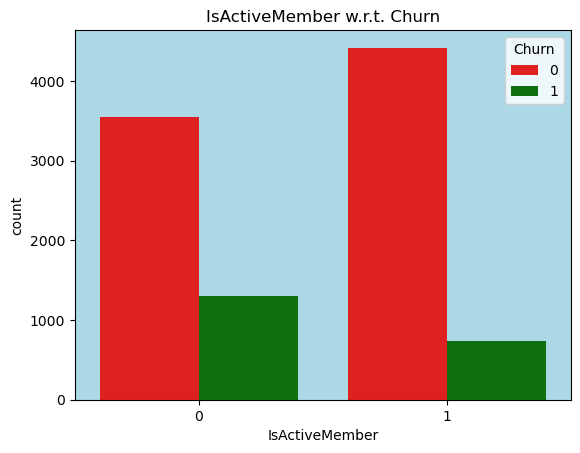

In [39]:
multivariate_comparision('IsActiveMember','Churn')

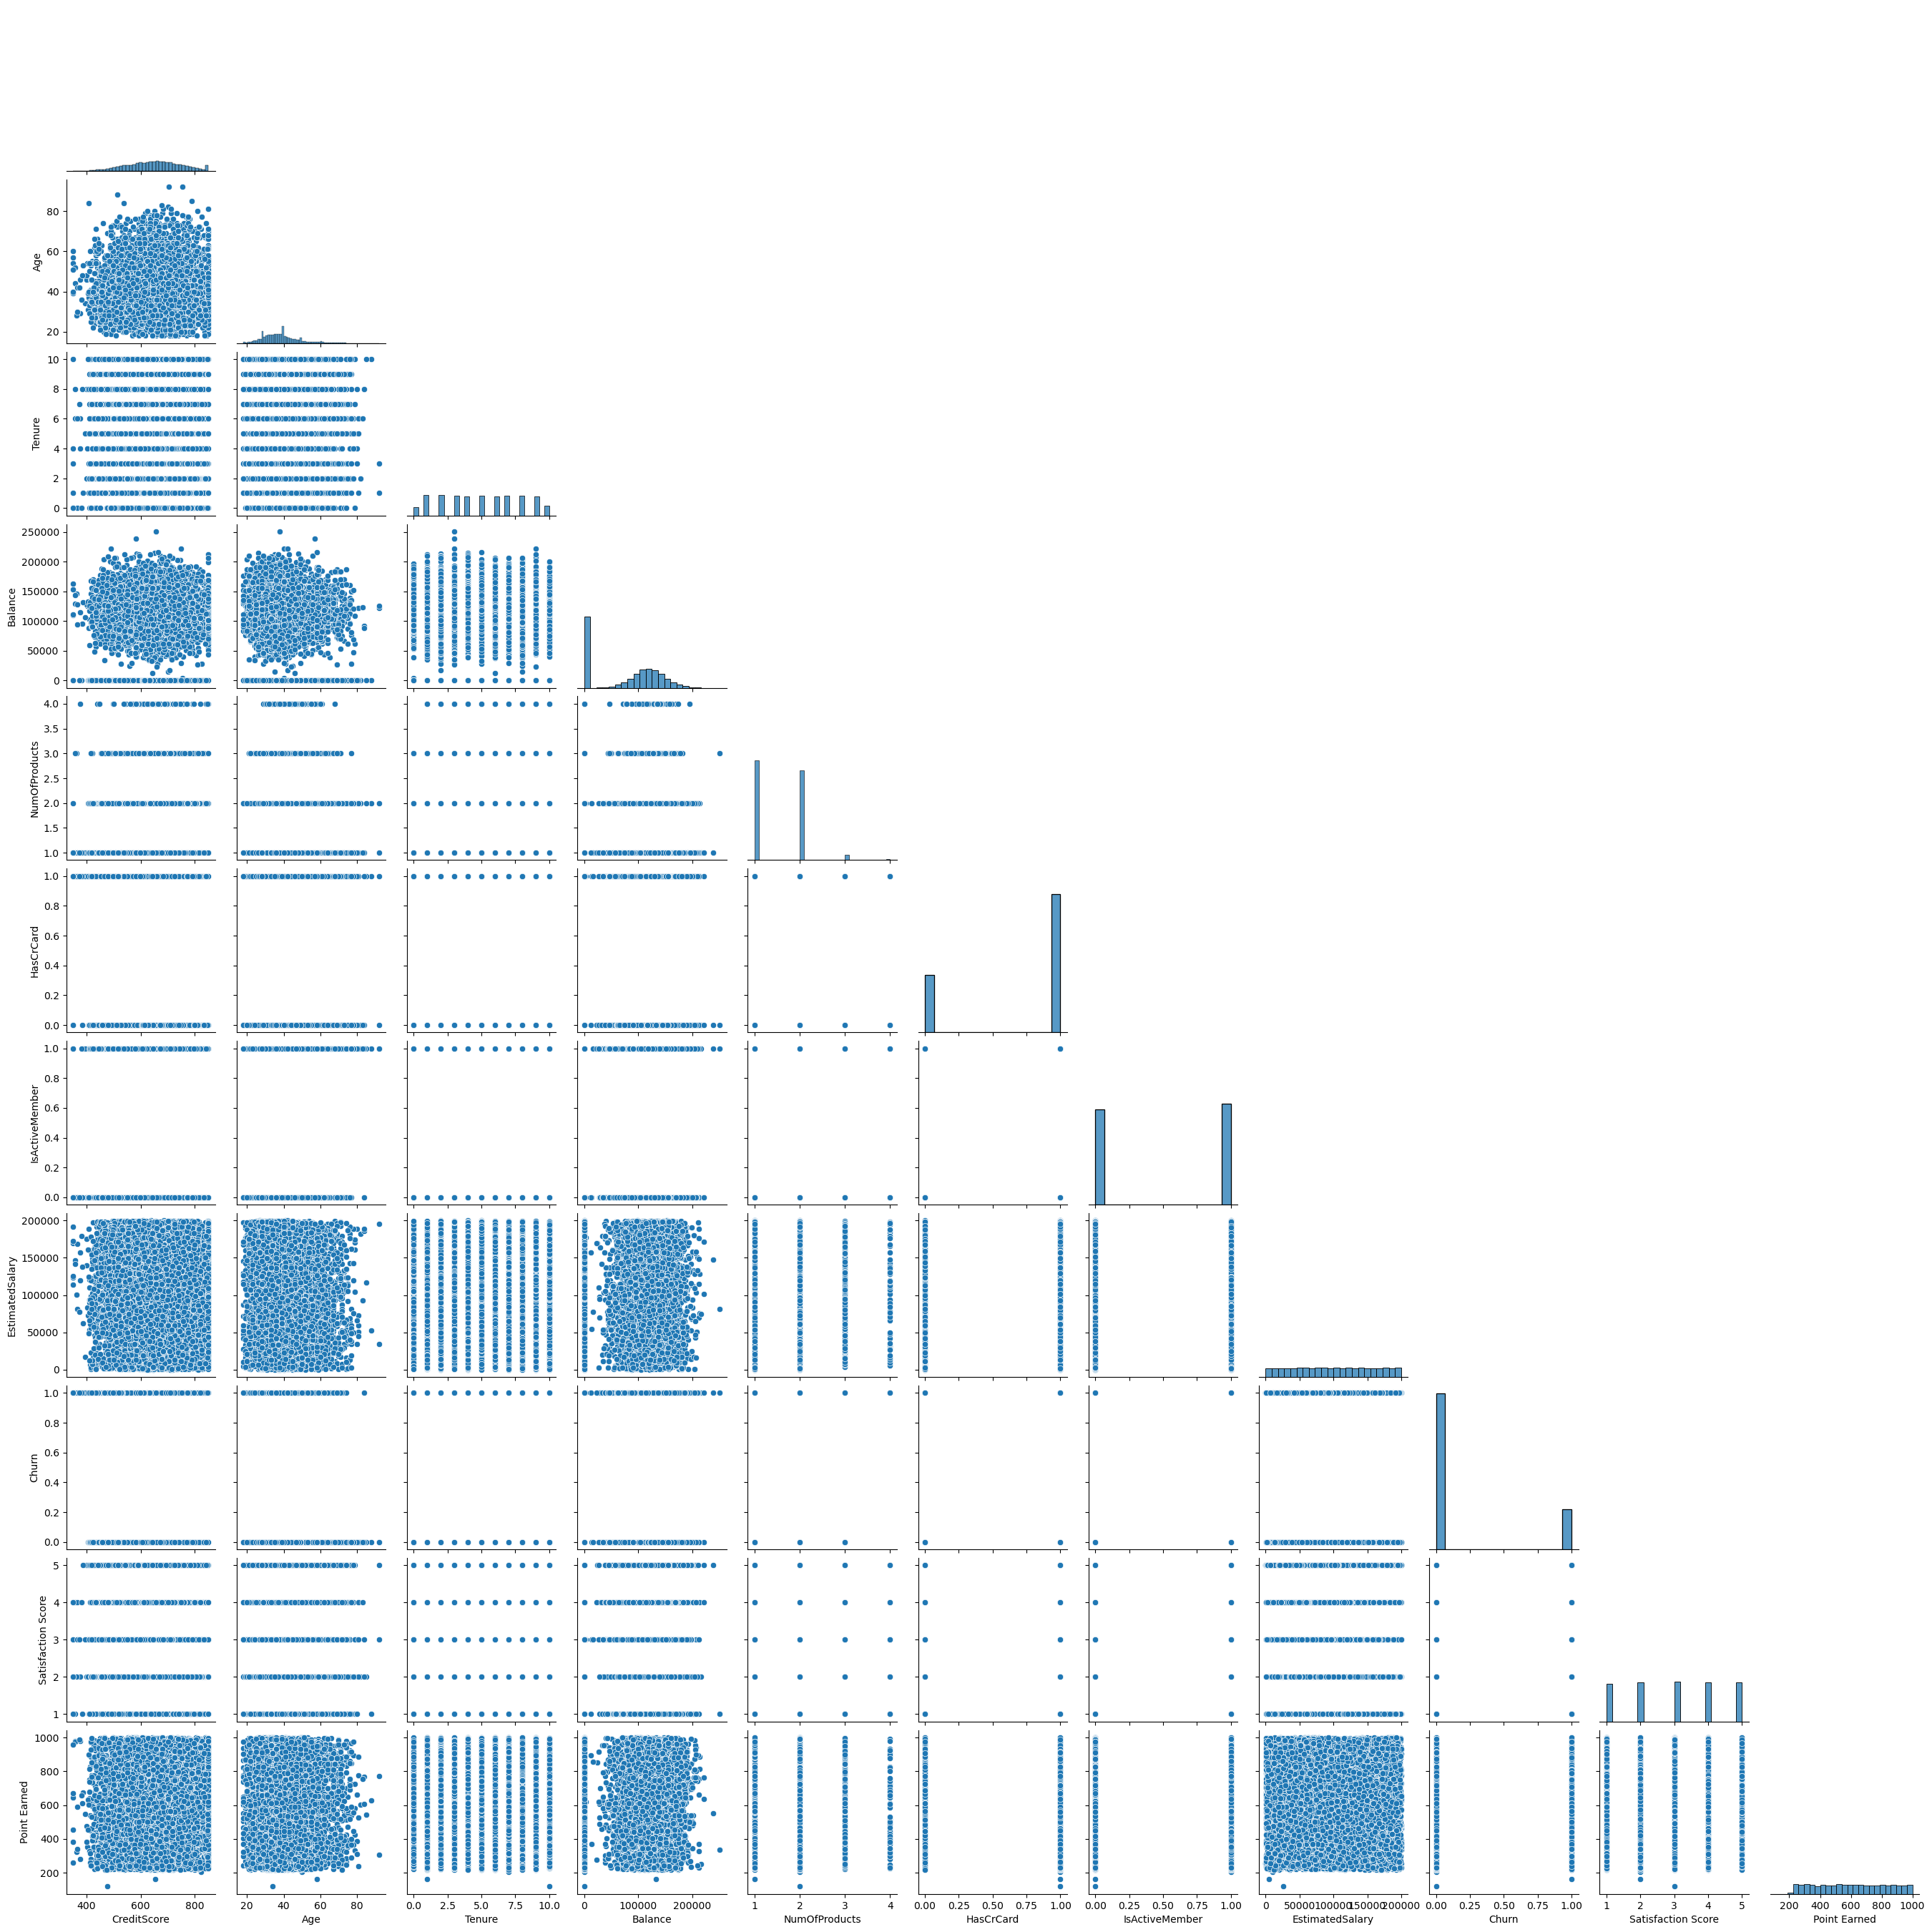

In [40]:
sns.pairplot(data=df_new , corner=True)
plt.show()

It is difficult to understand anything from this pairplot

In [41]:
# Groupby
df_new.groupby(df_new.Age).Balance.mean()

Age
18     79169.57500
19     70502.53963
20     76038.89000
21     75926.88283
22     68213.74881
          ...     
83    123356.63000
84     90057.86500
85         0.00000
88         0.00000
92    123794.77500
Name: Balance, Length: 70, dtype: float64

In [42]:
## Multivariate Analysis
df_new

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Churn  Satisfaction Score  \
0             1               1        101348.88      1                   2   
1             0               1        112542.58      0                   3   
2             1               0        113931.57      1                   3   
3             0               0         93826.63      0                   5   
4             1               1         79084.10      0                   5   
...         ...             ...              ...    ...                 ...   
9995          1               0         96270.64      0                   1   
9996          1               1        101699.77      0                   5   
9997          0               1         42085.58      1                   3   
9998          1               0         92888.52      1                   2   
9999          1               0         38190.78      0                   3   

     Card Type  Point Earned  
0      DIAMOND           464  
1      DIAMOND           456  
2      DIAMOND           377  
3         GOLD           350  
4         GOLD           425  
...        ...           ...  
9995   DIAMOND           300  
9996  PLATINUM           771  
9997    SILVER           564  
9998      GOLD           339  
9999   DIAMOND           911  

[10000 rows x 14 columns]

C:\Users\mdhus\AppData\Local\Temp\ipykernel_17036\2595269471.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(x = df_new["Age"], y = df_new["Balance"], hue=df_new["Churn"], palette = ['Red','Green'],  ci=0).set(title= 'Exit ratio w.r.t Balance and Age')


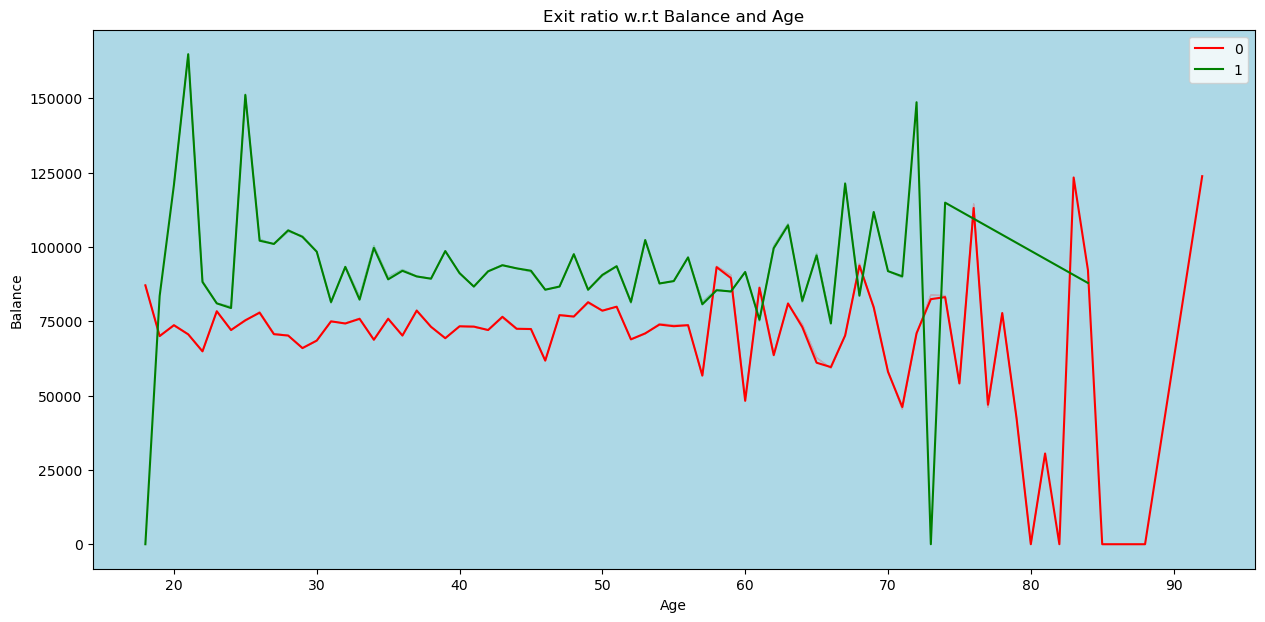

In [45]:
plt.figure(figsize=(15,7))
sns.lineplot(x = df_new["Age"], y = df_new["Balance"], hue=df_new["Churn"], palette = ['Red','Green'],  ci=0).set(title= 'Exit ratio w.r.t Balance and Age')
plt.legend(loc = 'upper right')
plt.gca().set_facecolor('lightblue')
plt.show()

C:\Users\mdhus\AppData\Local\Temp\ipykernel_17036\3631100278.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(x = df_new["Point Earned"], y = df_new["EstimatedSalary"], hue=df_new["Churn"], palette = ['Red','Green'],  ci=0).set(title= 'Exit ratio w.r.t Balance and Age')


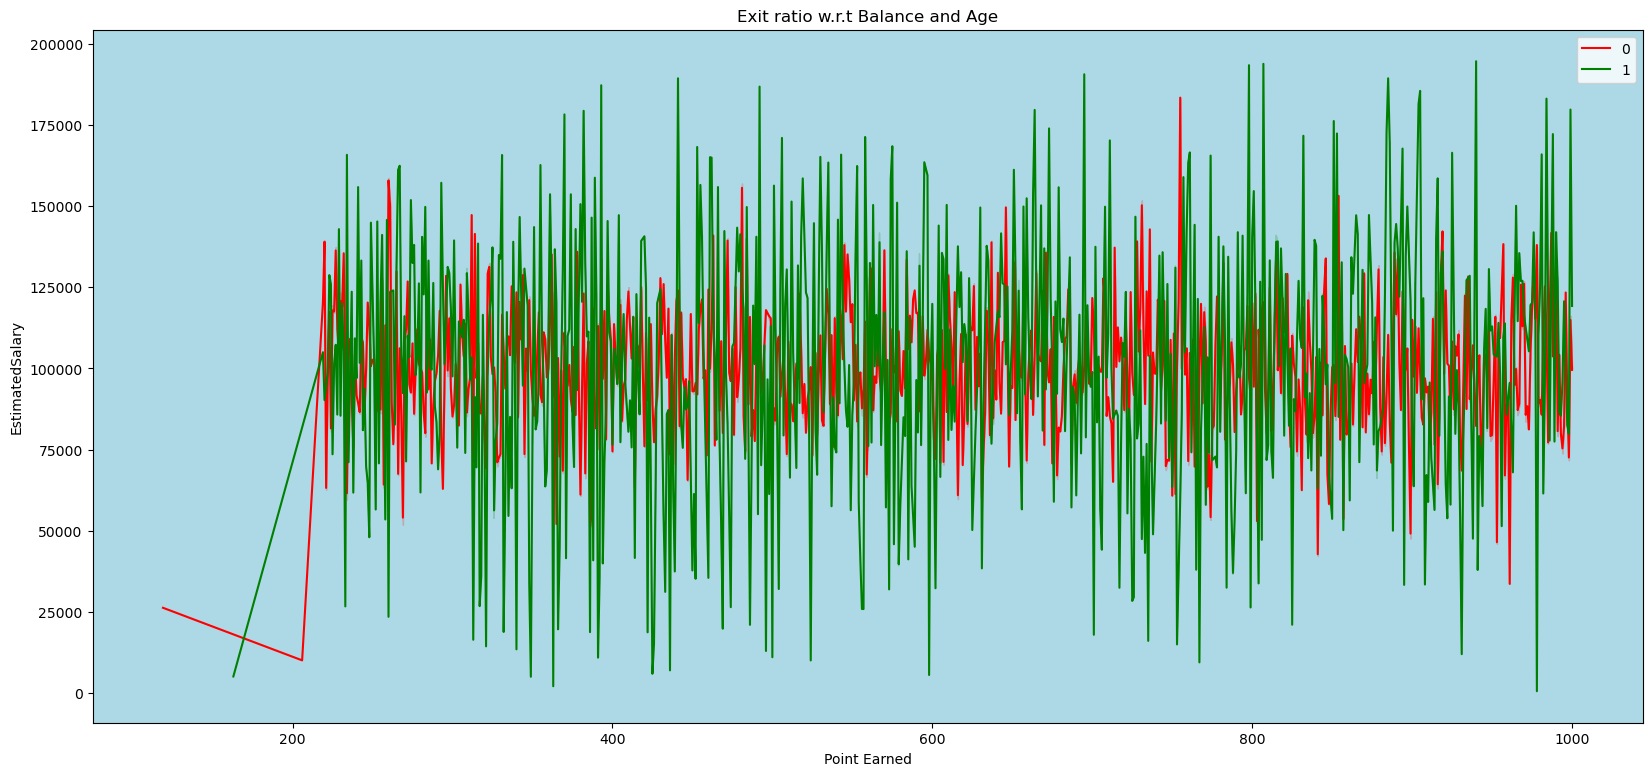

In [46]:
# Similarly lets see the relationship between Gender Geography and Exited
plt.figure(figsize=(20,9))
sns.lineplot(x = df_new["Point Earned"], y = df_new["EstimatedSalary"], hue=df_new["Churn"], palette = ['Red','Green'],  ci=0).set(title= 'Exit ratio w.r.t Balance and Age')
plt.legend(loc = 'upper right')
plt.gca().set_facecolor('lightblue')
plt.show()

Text(0.5, 1.0, 'Distribution of Estimated Salary by churn')

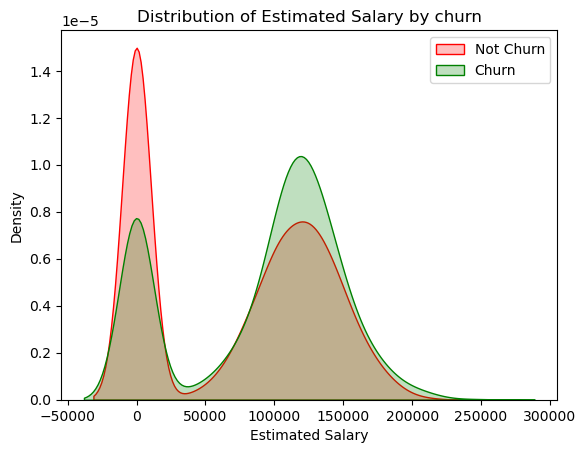

In [56]:
# KDE plot
ax = sns.kdeplot(df.Balance[(df_new["Churn"] == 0) ],
                color="Red", fill = True)
ax = sns.kdeplot(df.Balance[(df_new["Churn"] == 1) ],
                ax = ax, color="Green", fill= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Estimated Salary')
ax.set_title('Distribution of Estimated Salary by churn')

## Data Preprocessing

### 1. Dimensionality Reduction

In [57]:
df_new

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Churn  Satisfaction Score  \
0             1               1        101348.88      1                   2   
1             0               1        112542.58      0                   3   
2             1               0        113931.57      1                   3   
3             0               0         93826.63      0                   5   
4             1               1         79084.10      0                   5   
...         ...             ...              ...    ...                 ...   
9995          1               0         96270.64      0                   1   
9996          1               1        101699.77      0                   5   
9997          0               1         42085.58      1                   3   
9998          1               0         92888.52      1                   2   
9999          1               0         38190.78      0                   3   

     Card Type  Point Earned  
0      DIAMOND           464  
1      DIAMOND           456  
2      DIAMOND           377  
3         GOLD           350  
4         GOLD           425  
...        ...           ...  
9995   DIAMOND           300  
9996  PLATINUM           771  
9997    SILVER           564  
9998      GOLD           339  
9999   DIAMOND           911  

[10000 rows x 14 columns]

In [62]:
# Here we have Three ccategorical columns that we need to transform into continuous variable

transformed = pd.get_dummies(df_new[["Geography", "Gender", "Card Type"]], drop_first = True) 

In [63]:
transformed

Geography_Germany  Geography_Spain  Gender_Male  Card Type_GOLD  \
0                     0                0            0               0   
1                     0                1            0               0   
2                     0                0            0               0   
3                     0                0            0               1   
4                     0                1            0               1   
...                 ...              ...          ...             ...   
9995                  0                0            1               0   
9996                  0                0            1               0   
9997                  0                0            0               0   
9998                  1                0            1               1   
9999                  0                0            0               0   

      Card Type_PLATINUM  Card Type_SILVER  
0                      0                 0  
1                      0                 0  
2                      0                 0  
3                      0                 0  
4                      0                 0  
...                  ...               ...  
9995                   0                 0  
9996                   1                 0  
9997                   0                 1  
9998                   0                 0  
9999                   0                 0  

[10000 rows x 6 columns]

In [64]:
df_new = pd.concat([df_new, transformed], axis=1)
df_new

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Churn  Satisfaction Score  \
0             1               1        101348.88      1                   2   
1             0               1        112542.58      0                   3   
2             1               0        113931.57      1                   3   
3             0               0         93826.63      0                   5   
4             1               1         79084.10      0                   5   
...         ...             ...              ...    ...                 ...   
9995          1               0         96270.64      0                   1   
9996          1               1        101699.77      0                   5   
9997          0               1         42085.58      1                   3   
9998          1               0         92888.52      1                   2   
9999          1               0         38190.78      0                   3   

     Card Type  Point Earned  Geography_Germany  Geography_Spain  Gender_Male  \
0      DIAMOND           464                  0                0            0   
1      DIAMOND           456                  0                1            0   
2      DIAMOND           377                  0                0            0   
3         GOLD           350                  0                0            0   
4         GOLD           425                  0                1            0   
...        ...           ...                ...              ...          ...   
9995   DIAMOND           300                  0                0            1   
9996  PLATINUM           771                  0                0            1   
9997    SILVER           564                  0                0            0   
9998      GOLD           339                  1                0            1   
9999   DIAMOND           911                  0                0            0   

      Card Type_GOLD  Card Type_PLATINUM  Card Type_SILVER  
0                  0                   0                 0  
1                  0                   0                 0  
2                  0                   0                 0  
3                  1                   0                 0  
4                  1                   0                 0  
...              ...                 ...               ...  
9995               0                   0                 0  
9996               0                   1                 0  
9997               0                   0                 1  
9998               1                   0                 0  
9999               0                   0                 0  

[10000 rows x 20 columns]

In [65]:
df_new.drop(['Geography', 'Gender', 'Card Type'],axis = 1, inplace = True)

In [66]:
df_new

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Churn  Satisfaction Score  \
0                  1        101348.88      1                   2   
1                  1        112542.58      0                   3   
2                  0        113931.57      1                   3   
3                  0         93826.63      0                   5   
4                  1         79084.10      0                   5   
...              ...              ...    ...                 ...   
9995               0         96270.64      0                   1   
9996               1        101699.77      0                   5   
9997               1         42085.58      1                   3   
9998               0         92888.52      1                   2   
9999               0         38190.78      0                   3   

      Point Earned  Geography_Germany  Geography_Spain  Gender_Male  \
0              464                  0                0            0   
1              456                  0                1            0   
2              377                  0                0            0   
3              350                  0                0            0   
4              425                  0                1            0   
...            ...                ...              ...          ...   
9995           300                  0                0            1   
9996           771                  0                0            1   
9997           564                  0                0            0   
9998           339                  1                0            1   
9999           911                  0                0            0   

      Card Type_GOLD  Card Type_PLATINUM  Card Type_SILVER  
0                  0                   0                 0  
1                  0                   0                 0  
2                  0                   0                 0  
3                  1                   0                 0  
4                  1                   0                 0  
...              ...                 ...               ...  
9995               0                   0                 0  
9996               0                   1                 0  
9997               0                   0                 1  
9998               1                   0                 0  
9999               0                   0                 0  

[10000 rows x 17 columns]

## Feature Scaling
### We need to scale down the remaining variables
The most suitabe sclaer for continuous data would be min-max scaler.

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [70]:
# Fit the scaler to necessary variables
var_to_transform = ['CreditScore','Age','Tenure','Balance','NumOfProducts',
                      'EstimatedSalary','Satisfaction Score', 'Point Earned']
df_new[var_to_transform] = scaler.fit_transform(df_new[var_to_transform])


In [71]:
df_new

CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0           0.538  0.324324     0.2  0.000000       0.000000          1   
1           0.516  0.310811     0.1  0.334031       0.000000          0   
2           0.304  0.324324     0.8  0.636357       0.666667          1   
3           0.698  0.283784     0.1  0.000000       0.333333          0   
4           1.000  0.337838     0.2  0.500246       0.000000          1   
...           ...       ...     ...       ...            ...        ...   
9995        0.842  0.283784     0.5  0.000000       0.333333          1   
9996        0.332  0.229730     1.0  0.228657       0.000000          1   
9997        0.718  0.243243     0.7  0.000000       0.000000          0   
9998        0.844  0.324324     0.3  0.299226       0.333333          1   
9999        0.884  0.135135     0.4  0.518708       0.000000          1   

      IsActiveMember  EstimatedSalary  Churn  Satisfaction Score  \
0                  1         0.506735      1                0.25   
1                  1         0.562709      0                0.50   
2                  0         0.569654      1                0.50   
3                  0         0.469120      0                1.00   
4                  1         0.395400      0                1.00   
...              ...              ...    ...                 ...   
9995               0         0.481341      0                0.00   
9996               1         0.508490      0                1.00   
9997               1         0.210390      1                0.50   
9998               0         0.464429      1                0.25   
9999               0         0.190914      0                0.50   

      Point Earned  Geography_Germany  Geography_Spain  Gender_Male  \
0         0.391600                  0                0            0   
1         0.382520                  0                1            0   
2         0.292849                  0                0            0   
3         0.262202                  0                0            0   
4         0.347333                  0                1            0   
...            ...                ...              ...          ...   
9995      0.205448                  0                0            1   
9996      0.740068                  0                0            1   
9997      0.505108                  0                0            0   
9998      0.249716                  1                0            1   
9999      0.898978                  0                0            0   

      Card Type_GOLD  Card Type_PLATINUM  Card Type_SILVER  
0                  0                   0                 0  
1                  0                   0                 0  
2                  0                   0                 0  
3                  1                   0                 0  
4                  1                   0                 0  
...              ...                 ...               ...  
9995               0                   0                 0  
9996               0                   1                 0  
9997               0                   0                 1  
9998               1                   0                 0  
9999               0                   0                 0  

[10000 rows x 17 columns]

### Splitting the data into train and test
Here we will train our model in the data and test it against the Churn column. 

In [75]:
X = df_new.drop('Churn', axis=1)

In [76]:
X.head()

CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.538  0.324324     0.2  0.000000       0.000000          1   
1        0.516  0.310811     0.1  0.334031       0.000000          0   
2        0.304  0.324324     0.8  0.636357       0.666667          1   
3        0.698  0.283784     0.1  0.000000       0.333333          0   
4        1.000  0.337838     0.2  0.500246       0.000000          1   

   IsActiveMember  EstimatedSalary  Satisfaction Score  Point Earned  \
0               1         0.506735                0.25      0.391600   
1               1         0.562709                0.50      0.382520   
2               0         0.569654                0.50      0.292849   
3               0         0.469120                1.00      0.262202   
4               1         0.395400                1.00      0.347333   

   Geography_Germany  Geography_Spain  Gender_Male  Card Type_GOLD  \
0                  0                0            0               0   
1                  0                1            0               0   
2                  0                0            0               0   
3                  0                0            0               1   
4                  0                1            0               1   

   Card Type_PLATINUM  Card Type_SILVER  
0                   0                 0  
1                   0                 0  
2                   0                 0  
3                   0                 0  
4                   0                 0

In [77]:
X = X.values

In [79]:
y = df_new["Churn"]

In [80]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Churn, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [83]:
X_train.shape

(8000, 16)

## Fitting the data into a model
### We will be fitting the data into various models
### Below are the Algorithms we will fit out Data to:
#### 1. Naive Bayes
#### 2. Decision Tree
#### 3. Random Forest
#### 4. Logistic Regression
#### 5. Adaboost
#### 6. KNN

In [151]:
# Importing Necessary libraries
from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
# from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_curve, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline

### 1. Naive Bayes

In [106]:
model = GaussianNB()
model.fit(X_train,y_train)
accuracy_NB = model.score(X_test, y_test)
print("Accuracy of the NB model is: ", accuracy_NB)

Accuracy of the NB model is:  0.834


In [107]:
pred = model.predict(X_test)
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1607
           1       0.64      0.36      0.46       393

    accuracy                           0.83      2000
   macro avg       0.75      0.65      0.68      2000
weighted avg       0.82      0.83      0.81      2000



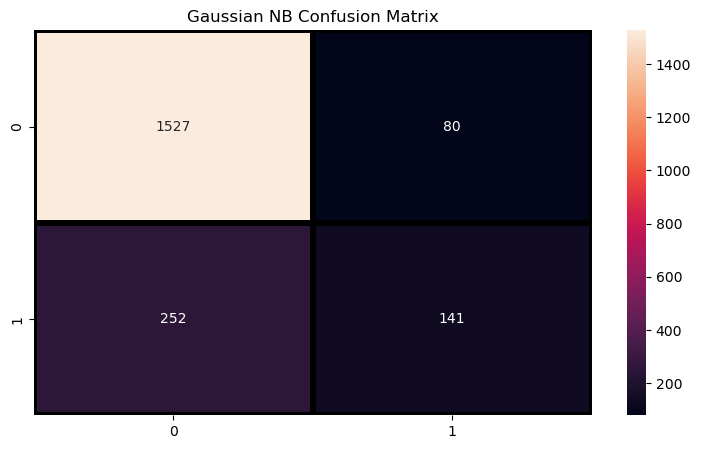

In [108]:
plt.figure(figsize = (9,5))
sns.heatmap(confusion_matrix(y_test, pred),annot = True, fmt = "d",linecolor="k",linewidths=3)
plt.title("Gaussian NB Confusion Matrix")
plt.show()

##### GaussianNB gave us a accuracy of 83.40% which is decent but still needs imporvements. Let's See how other Algorithms Perform

### 2. Decision Trees

In [113]:
# Decision Trees
parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = DecisionTreeClassifier()
gridDecisionTree = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridDecisionTree.fit(X_train, y_train)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max depth: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)



Mín Split:  7
Max depth:  6
Algorithm:  entropy
Score:  0.8538743703548685


In [116]:
# Using these criterias in our Decision tree, we will predict the result
model_dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 5, max_depth= 7, random_state=0)
model_dt.fit(X_train, y_train)
accuracy_DT = model_dt.score(X_test, y_test)
print("Accuracy of the DT model is: ", accuracy_DT)

Accuracy of the DT model is:  0.858


In [122]:
## Decison Tree provided an accuracy of 85.8% which is an increment from the GNB model.
def performance_report(model):
    pred = model.predict(X_test)
    report = classification_report(y_test, pred)
    print(report)
performance_report(model_dt)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.72      0.46      0.56       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



Enter Name of the current Model: Decision Tree


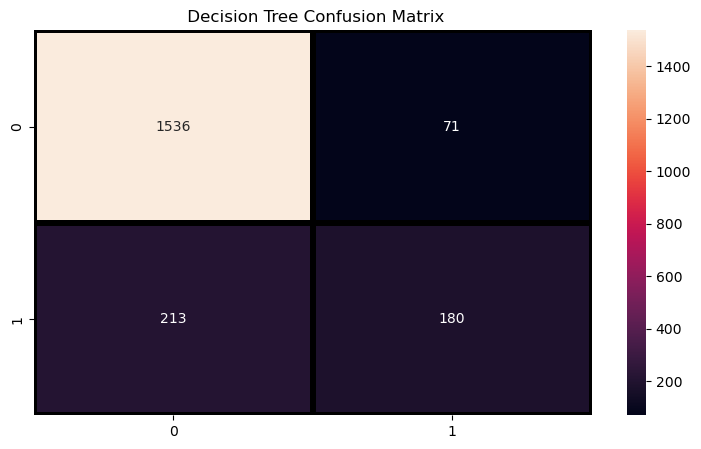

In [134]:
def plot_cf(a,b):
    model_name = input("Enter Name of the current Model: ")
    plt.figure(figsize = (9,5))
    sns.heatmap(confusion_matrix(a,b),annot = True, fmt = "d",linecolor="k",linewidths=3)
    plt.title(f" {model_name} Confusion Matrix")
    return plt.show()
plot_cf(y_test, pred)

##### We can Clearly see a slight improvement in the TP in the Confusion Matrix. TN also increased slightly

### 3. Random Forest

In [143]:
model_RF = RandomForestClassifier(n_estimators=100 , oob_score = True, n_jobs = -1,
                                  random_state =42,
                                  max_leaf_nodes = 25)

model_RF.fit(X_train, y_train)
# cv_scores = cross_val_score(model_RF, X_train, y_train, cv= 10) # Five fold cross validation
# print("Cross-Validation Scores:", cv_scores)
# average_cv_score = np.mean(cv_scores)
# print("Average Cross-Validation Score:", average_cv_score)
accuracy_RF = model_dt.score(X_test, y_test)
print("Accuracy of the RFC model is: ", accuracy_RF)


Accuracy of the RFC model is:  0.858


Even with 10 folds cross validatin the result was same
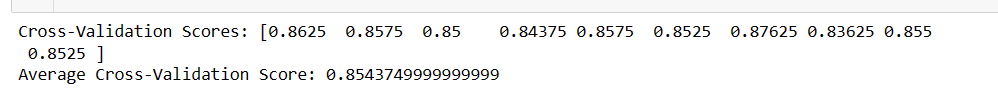

In [144]:
#Plotting Performance Report
performance_report(model_RF)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.83      0.34      0.48       393

    accuracy                           0.86      2000
   macro avg       0.84      0.66      0.70      2000
weighted avg       0.85      0.86      0.83      2000



Enter Name of the current Model: Random Forest Clf


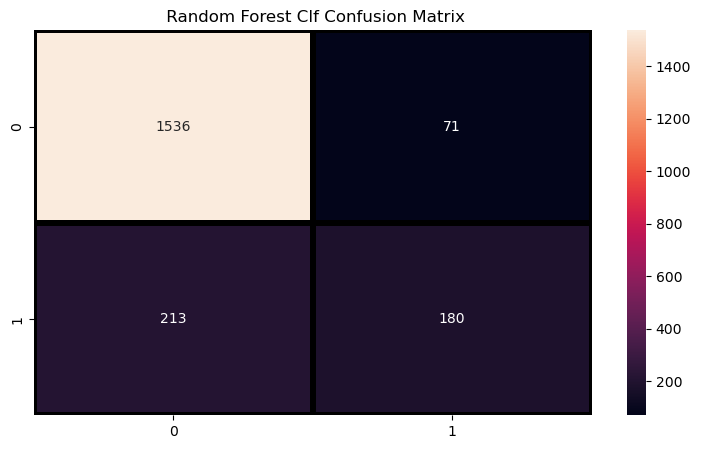

In [145]:
# Plotting Heatmap or Confusion Matric
plot_cf(y_test, pred)

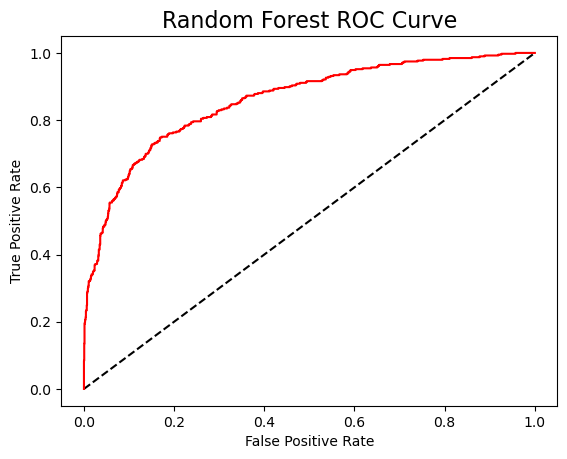

In [156]:
# The Accuracy produced by Both Decision Trees and Random Forest is Exactly same. Lets plot the Roc Curve     
y_pred_prob = model_RF.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Random Forest Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show()

### 4. Logistic Regression

In [161]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
accuracy_LR = model_LR.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_LR)

Logistic Regression accuracy is : 0.812


In [162]:
performance_report(model_LR)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



Enter Name of the current Model: Logistic Regression


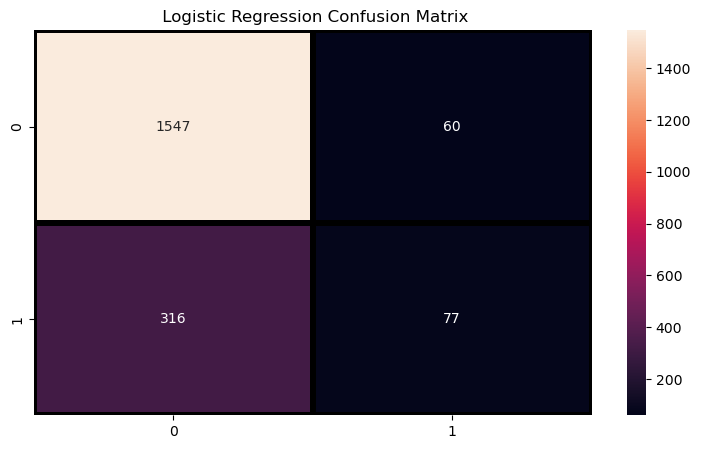

In [163]:
plot_cf(y_test, pred)

##### Here, Despite decrease in accuracy, we can see a slight improvement in the prediction of True Positives While the prediction False Positive Decreased. Prediction of True Negative went down in Logistic Regression.

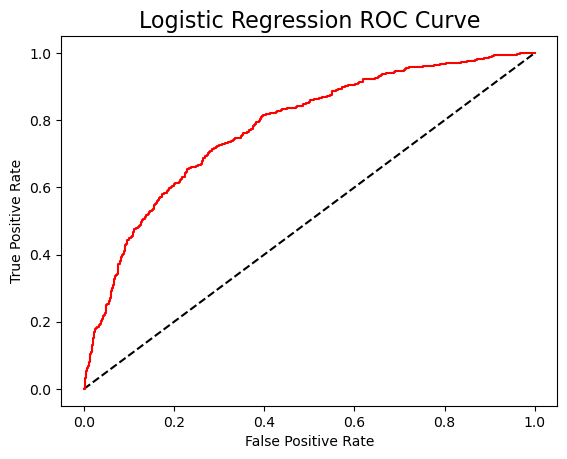

In [164]:
y_pred_prob = model_LR.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show()